In [53]:
import pandas as pd

In [54]:
ha = pd.read_csv("https://www.dropbox.com/s/aohbr6yb9ifmc8w/heart_attack.csv?dl=1")
ha.head()

,age,sex,cp,trtbps,chol,restecg,thalach,output
0,63,1,3,145,233,0,150,1
1,37,1,2,130,250,1,187,1
2,56,1,1,120,236,1,178,1
3,57,0,0,120,354,1,163,1
4,57,1,0,140,192,1,148,1


In [55]:
print(ha.isnull().sum())
print(ha.dtypes)
print(ha.describe())

age        0
sex        0
cp         0
trtbps     0
chol       0
restecg    0
thalach    0
output     0
dtype: int64
age        int64
sex        int64
cp         int64
trtbps     int64
chol       int64
restecg    int64
thalach    int64
output     int64
dtype: object
              age         sex          cp      trtbps        chol     restecg  \
count  273.000000  273.000000  273.000000  273.000000  273.000000  273.000000   
mean    54.347985    0.673993    0.974359  132.098901  246.860806    0.538462   
std      9.163134    0.469611    1.030456   17.700358   52.569726    0.528059   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.000000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    1.000000  130.000000  240.000000    1.000000   
75%     61.000000    1.000000    2.000000  140.000000  275.000000    1.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    2.000000   

   

# Part One: Fitting Models
Q1: KNN

In [56]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix
import numpy as np

# Preparing the data
X = ha.drop('output', axis=1)
y = ha['output']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Finding the best K for KNN using cross-validation
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=10, scoring='roc_auc')
    k_scores.append(scores.mean())

best_k = np.argmax(k_scores) + 1
best_knn_score = max(k_scores)

best_k, best_knn_score

(30, 0.8718888888888889)

In [57]:
#Fitting the final KNN model
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train, y_train)
#Confusion matrix
y_pred_knn = final_knn.predict(X_test)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix for KNN:")
print(conf_matrix_knn)

Confusion Matrix for KNN:
[[20 16]
 [17 29]]


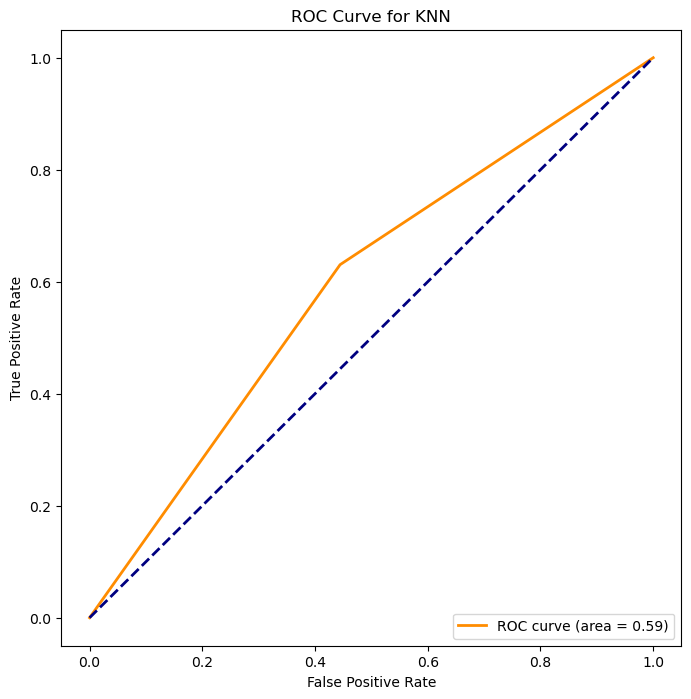

In [58]:
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
#ROC Curve
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn)
roc_auc_curve_knn = auc(fpr_knn, tpr_knn)
#Plot ROC Curve
plt.figure(figsize=(8, 8))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_curve_knn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN')
plt.legend(loc='lower right')
plt.show()

Q2: Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Setting up logistic regression with hyperparameter tuning
logreg = LogisticRegression()
param_grid = {'C': np.logspace(-4, 4, 20), 'solver': ['liblinear', 'lbfgs']}

# Cross-validated grid search
grid_search_lr = GridSearchCV(logreg, param_grid, cv=10, scoring='roc_auc', n_jobs=-1)
grid_search_lr.fit(X_train_scaled, y_train)

# Best model and score
best_lr_model = grid_search_lr.best_estimator_
best_lr_score = grid_search_lr.best_score_

# Confusion matrix for logistic regression
y_pred_lr = best_lr_model.predict(X_test_scaled)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

best_lr_model, best_lr_score, conf_matrix_lr

(LogisticRegression(C=0.23357214690901212, solver='liblinear'),
 0.891,
 array([[26, 10],
        [18, 28]]))

/Users/ruojiakuang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix for Logistic Regression:
[[26 10]
 [17 29]]
Cross-validated ROC AUC for Logistic Regression: 0.676328502415459


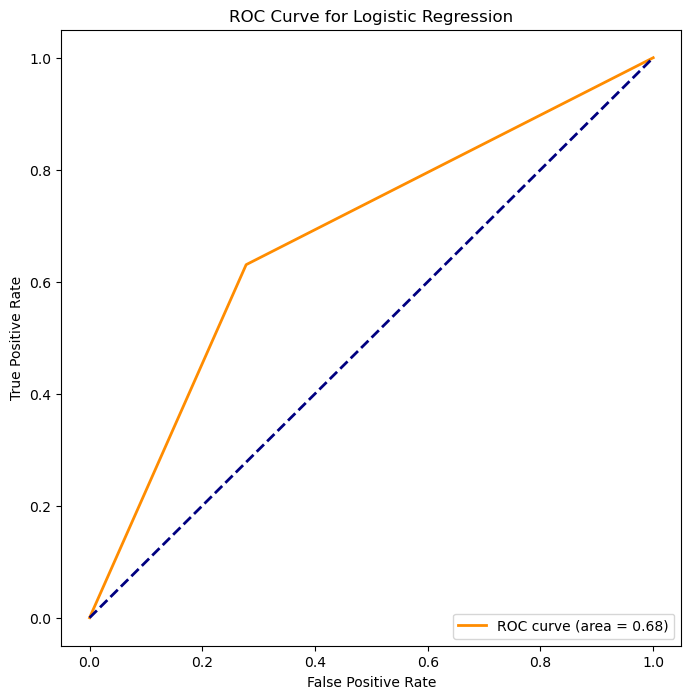

In [60]:
from sklearn.linear_model import LogisticRegression
#Fitting Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
#Confusion matrix
y_pred_log_reg = log_reg.predict(X_test)
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
print("Confusion Matrix for Logistic Regression:")
print(conf_matrix_log_reg)
#ROC AUC
roc_auc_log_reg = roc_auc_score(y_test, y_pred_log_reg)
print(f"Cross-validated ROC AUC for Logistic Regression: {roc_auc_log_reg}")
#ROC Curve
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_pred_log_reg)
roc_auc_curve_log_reg = auc(fpr_log_reg, tpr_log_reg)
#Plotting ROC Curve
plt.figure(figsize=(8, 8))
plt.plot(fpr_log_reg, tpr_log_reg, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_curve_log_reg:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

In [61]:
from sklearn.pipeline import make_pipeline
# Standardizing the data and creating a logistic regression pipeline
pipeline = make_pipeline(StandardScaler(), LogisticRegression())

# Setting up hyperparameter tuning using GridSearchCV
param_grid = {
    'logisticregression__C': np.logspace(-4, 4, 20),
    'logisticregression__solver': ['liblinear', 'lbfgs']
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc')

# Training the model
grid_search.fit(X_train, y_train)

# Best model from grid search
best_model = grid_search.best_estimator_

# Predicting on the test set
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Coefficients of the model
coefficients = best_model.named_steps['logisticregression'].coef_[0]
coefficients

array([-0.17147476, -0.45237058,  0.4566395 , -0.11407096, -0.10727908,
        0.02553159,  0.54979587])

Q3: Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier

# Function to train and evaluate decision tree models with various depths
def evaluate_decision_trees(max_depths):
    results = []
    for depth in max_depths:
        # Create and train the model
        model = DecisionTreeClassifier(max_depth=depth, random_state=42)
        model.fit(X_train, y_train)

        # Predict probabilities for the test set
        y_probs = model.predict_proba(X_test)[:, 1]

        # Calculate ROC AUC
        roc_auc = roc_auc_score(y_test, y_probs)

        # Store the results
        results.append({'max_depth': depth, 'roc_auc': roc_auc})
    
    return pd.DataFrame(results)

# Evaluating models with different max depths
max_depths = range(1, 11)
evaluation_results = evaluate_decision_trees(max_depths)
evaluation_results.sort_values(by='roc_auc', ascending=False)

,max_depth,roc_auc
2,3,0.783816
3,4,0.765097
4,5,0.754831
1,2,0.708333
7,8,0.689010
8,9,0.689010
9,10,0.689010
5,6,0.683575
6,7,0.644928
0,1,0.579106


Depth of 3 yield best roc_auc score. 

In [63]:
# Define the parameter grid for the Decision Tree model
param_grid = {'max_depth': range(1, 10), 'min_samples_split': range(2, 10)}

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV to find the best parameters
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='roc_auc', return_train_score=True)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score

({'max_depth': 3, 'min_samples_split': 9}, 0.8039766081871346)

In [64]:
from sklearn.metrics import confusion_matrix

# Fit the best model to the training data
decision_tree = DecisionTreeClassifier(max_depth=best_params['max_depth'], 
                                       min_samples_split=best_params['min_samples_split'], 
                                       random_state=42)
decision_tree.fit(X_train, y_train)

# Predictions on the test set
y_pred = best_dt_model.predict(X_test)

# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[25, 11],
       [14, 32]])

In [65]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

DecisionTreeClassifier_pipeline = Pipeline(
  [("preprocessing", ct),
  ("regression", DecisionTreeClassifier())]
)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

DecisionTreeClassifier_pipeline.fit(X_train, y_train)

y_pred_train = DecisionTreeClassifier_pipeline.predict(X_train)

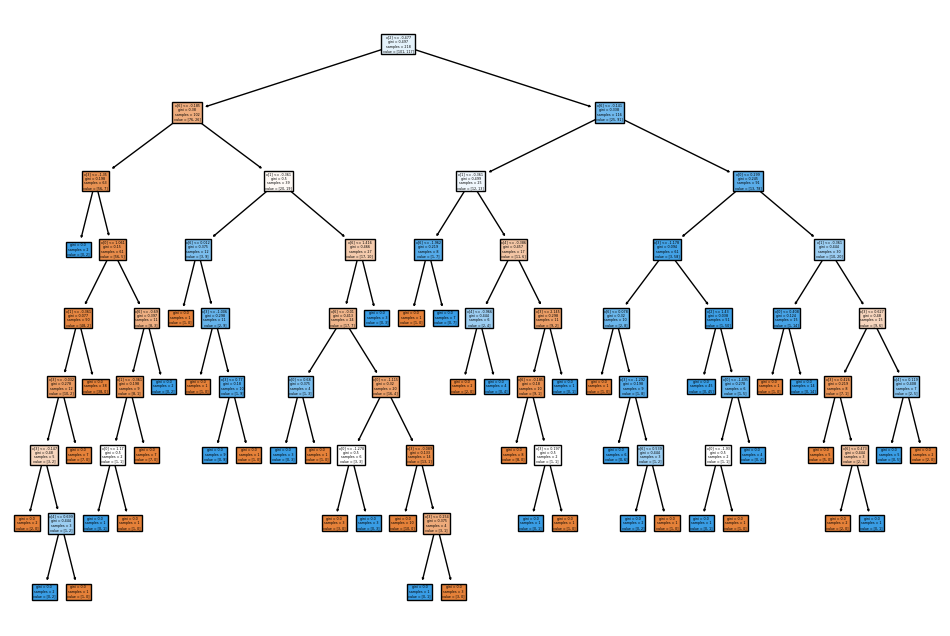

In [66]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
decision_tree_model = DecisionTreeClassifier_pipeline.named_steps['regression']
plt.figure(figsize=(12, 8))  # Adjust the size as needed
plot_tree(decision_tree_model, filled=True)
plt.show()

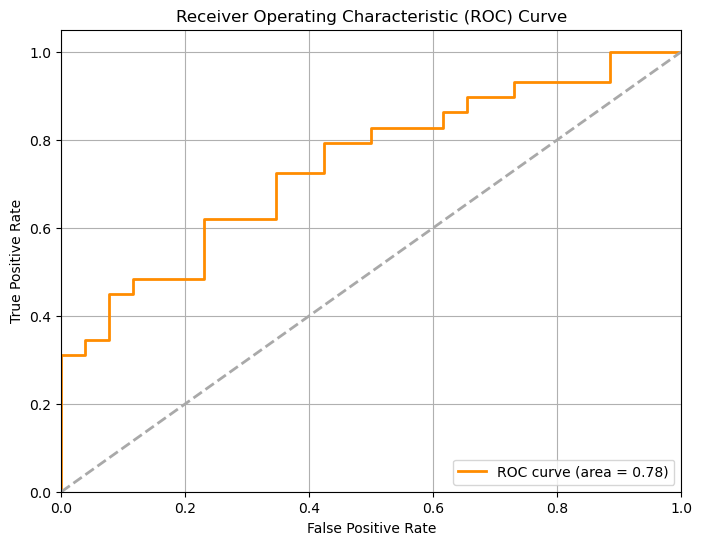

In [67]:
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
# Calculating the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='darkgray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Q4: Interpretation
Maximum heart rate achieved during exercise was most important to predicting heart attack risk. It has the greatest coefficients. 

# Part Two: Metrics

In [68]:
from sklearn.metrics import recall_score, precision_score, confusion_matrix
from sklearn.model_selection import cross_val_predict
#Function to compute specificity
def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)
#Function to compute and print metrics
def compute_metrics(model, model_name):
    #Cross-validated predictions
    y_pred_cv = cross_val_predict(model, X, y, cv=5)
    #Computing metrics
    recall = recall_score(y, y_pred_cv)
    precision = precision_score(y, y_pred_cv)
    specificity_val = specificity_score(y, y_pred_cv)
    #Printing metrics
    print(f"Metrics for {model_name}:")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Specificity: {specificity_val:.4f}")
    print("")
#Computing metrics for each model
compute_metrics(final_knn, "KNN")
compute_metrics(log_reg, "Logistic Regression")
compute_metrics(decision_tree, "Decision Tree")

Metrics for KNN:
Recall: 0.6986
Precision: 0.6623
Specificity: 0.5906

Metrics for Logistic Regression:
Recall: 0.8219
Precision: 0.7742
Specificity: 0.7244

Metrics for Decision Tree:
Recall: 0.7466
Precision: 0.7956
Specificity: 0.7795



/Users/ruojiakuang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ruojiakuang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

# Part Three: Discussion

Q1
The hospital faces severe lawsuits if they deem a patient to be low risk, and that patient later experiences a heart attack.

A1
The hospital is most concerned about false negatives, i.e., patients who are actually at high risk of a heart attack being incorrectly classified as low risk. This is a serious issue as it can lead to lawsuits and, more importantly, can endanger patients' lives. Therefore, the primary metric for model selection in this scenario should be Sensitivity or Recall. Therefore, logistic regression would be the best model in this situation. 

Q2
The hospital is overfull, and wants to only use bed space for patients most in need of monitoring due to heart attack risk.

A2
The hospital's goal is accurately identifying the highest risk patients while avoiding unnecessary hospitalization of low-risk individuals. The key metric here would be Precision. And the decision tree method has the higest precision. 

Q3
The hospital is studying root causes of heart attacks, and would like to understand which biological measures are associated with heart attack risk.

A3
Logistic regression and desicion tree might be the best model to understand the root causes of heart attack. The coefficients and relationships between the preditor variables can help to understand the reasoning and interpret the significant predictors. 

Q4
The hospital is training a new batch of doctors, and they would like to compare the diagnoses of these doctors to the predictions given by the algorithm to measure the ability of new doctors to diagnose patients.

A4
Accuracy is one of the key metrics of trainig new doctors. The logistic regression would be the best prediction since it has the greatest roc_auc curve. 

# Part Four: Validation

In [69]:
import pandas as pd
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
#Reading in the validation dataset
ha_validation = pd.read_csv("https://www.dropbox.com/s/jkwqdiyx6o6oad0/heart_attack_validation.csv?dl=1")
#Separating features and target variable for validation set
X_validation = ha_validation.drop('output', axis=1)
y_validation = ha_validation['output']
#Predictions for each model
y_pred_knn_validation = final_knn.predict(X_validation)
y_pred_log_reg_validation = log_reg.predict(X_validation)
y_pred_dt_validation = decision_tree.predict(X_validation)
#Function to print metrics and confusion matrix
def print_metrics(model_name, y_true, y_pred):
    roc_auc = roc_auc_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    print(f"Metrics for {model_name} on Validation Data:")
    print(f"Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print("")
#Printing metrics for each model on the validation data
print_metrics("KNN", y_validation, y_pred_knn_validation)
print_metrics("Logistic Regression", y_validation, y_pred_log_reg_validation)
print_metrics("Decision Tree", y_validation, y_pred_dt_validation)

Metrics for KNN on Validation Data:
Confusion Matrix:
[[ 6  5]
 [ 7 12]]
ROC AUC: 0.5885
Precision: 0.7059
Recall: 0.6316

Metrics for Logistic Regression on Validation Data:
Confusion Matrix:
[[ 9  2]
 [ 5 14]]
ROC AUC: 0.7775
Precision: 0.8750
Recall: 0.7368

Metrics for Decision Tree on Validation Data:
Confusion Matrix:
[[ 8  3]
 [ 6 13]]
ROC AUC: 0.7057
Precision: 0.8125
Recall: 0.6842



# Part Five: Cohen’s Kappa

In [70]:
from sklearn.metrics import cohen_kappa_score
# Creating function to print Cohen's Kappa
def print_kappa(model_name, y_true, y_pred):
    kappa = cohen_kappa_score(y_true, y_pred)
    print(f"Cohen's Kappa for {model_name}: {kappa:.4f}")
    print("")
#Printing Cohen's Kappa for each model
print_kappa("KNN", y_validation, y_pred_knn_validation)
print_kappa("Logistic Regression", y_validation, y_pred_log_reg_validation)
print_kappa("Decision Tree", y_validation, y_pred_dt_validation)

Cohen's Kappa for KNN: 0.1705

Cohen's Kappa for Logistic Regression: 0.5249

Cohen's Kappa for Decision Tree: 0.3891

